In [71]:
from Poisson import PoissonModel
from allocation import allocator
from hist_retrieval import hist_retriever
from allocation import allocator
from clustering import clusterer
from itertools import chain
import cPickle as pickle
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
% matplotlib inline

In [35]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Load pickled Poisson model
with open('PoissonModel.pkl', 'rb') as pkl_object:
    model = pickle.load(pkl_object)   

In [60]:
query = {'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'mariners', 'time_range': 0}

In [61]:
preds = model.predict(query)
preds

[('zone1', 19.879161626918705),
 ('zone2', 15.926433896358214),
 ('zone3', 10.645520356589104),
 ('zone4', 18.824449463208914),
 ('zone5', 25.070817033470174),
 ('zone6', 12.996972082692562),
 ('zone7', 18.078276651701092)]

In [62]:
alloc = allocator(query["num_units"], preds)
alloc

{'zone1': 4.0,
 'zone2': 4.0,
 'zone3': 4.0,
 'zone4': 3.0,
 'zone5': 4.0,
 'zone6': 3.0,
 'zone7': 3.0}

In [63]:
# Homegames
mariners, seahawks, sounders = 0,0,0
if query['home_game'] == 'mariners':
    mariners = 1
if query['home_game'] == 'seahawks':
    seahawks = 1
if query['home_game'] == 'sounders':
    sounders = 1

    
df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone1')
df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone2')
df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone3')
df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone4')
df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone5')
df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone6')
df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone7')

In [64]:
# Find centroids with clusterer
centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))

In [65]:
# Combine centroids and create DataFrame of locations
centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                       centroids5, centroids6, centroids7))
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']

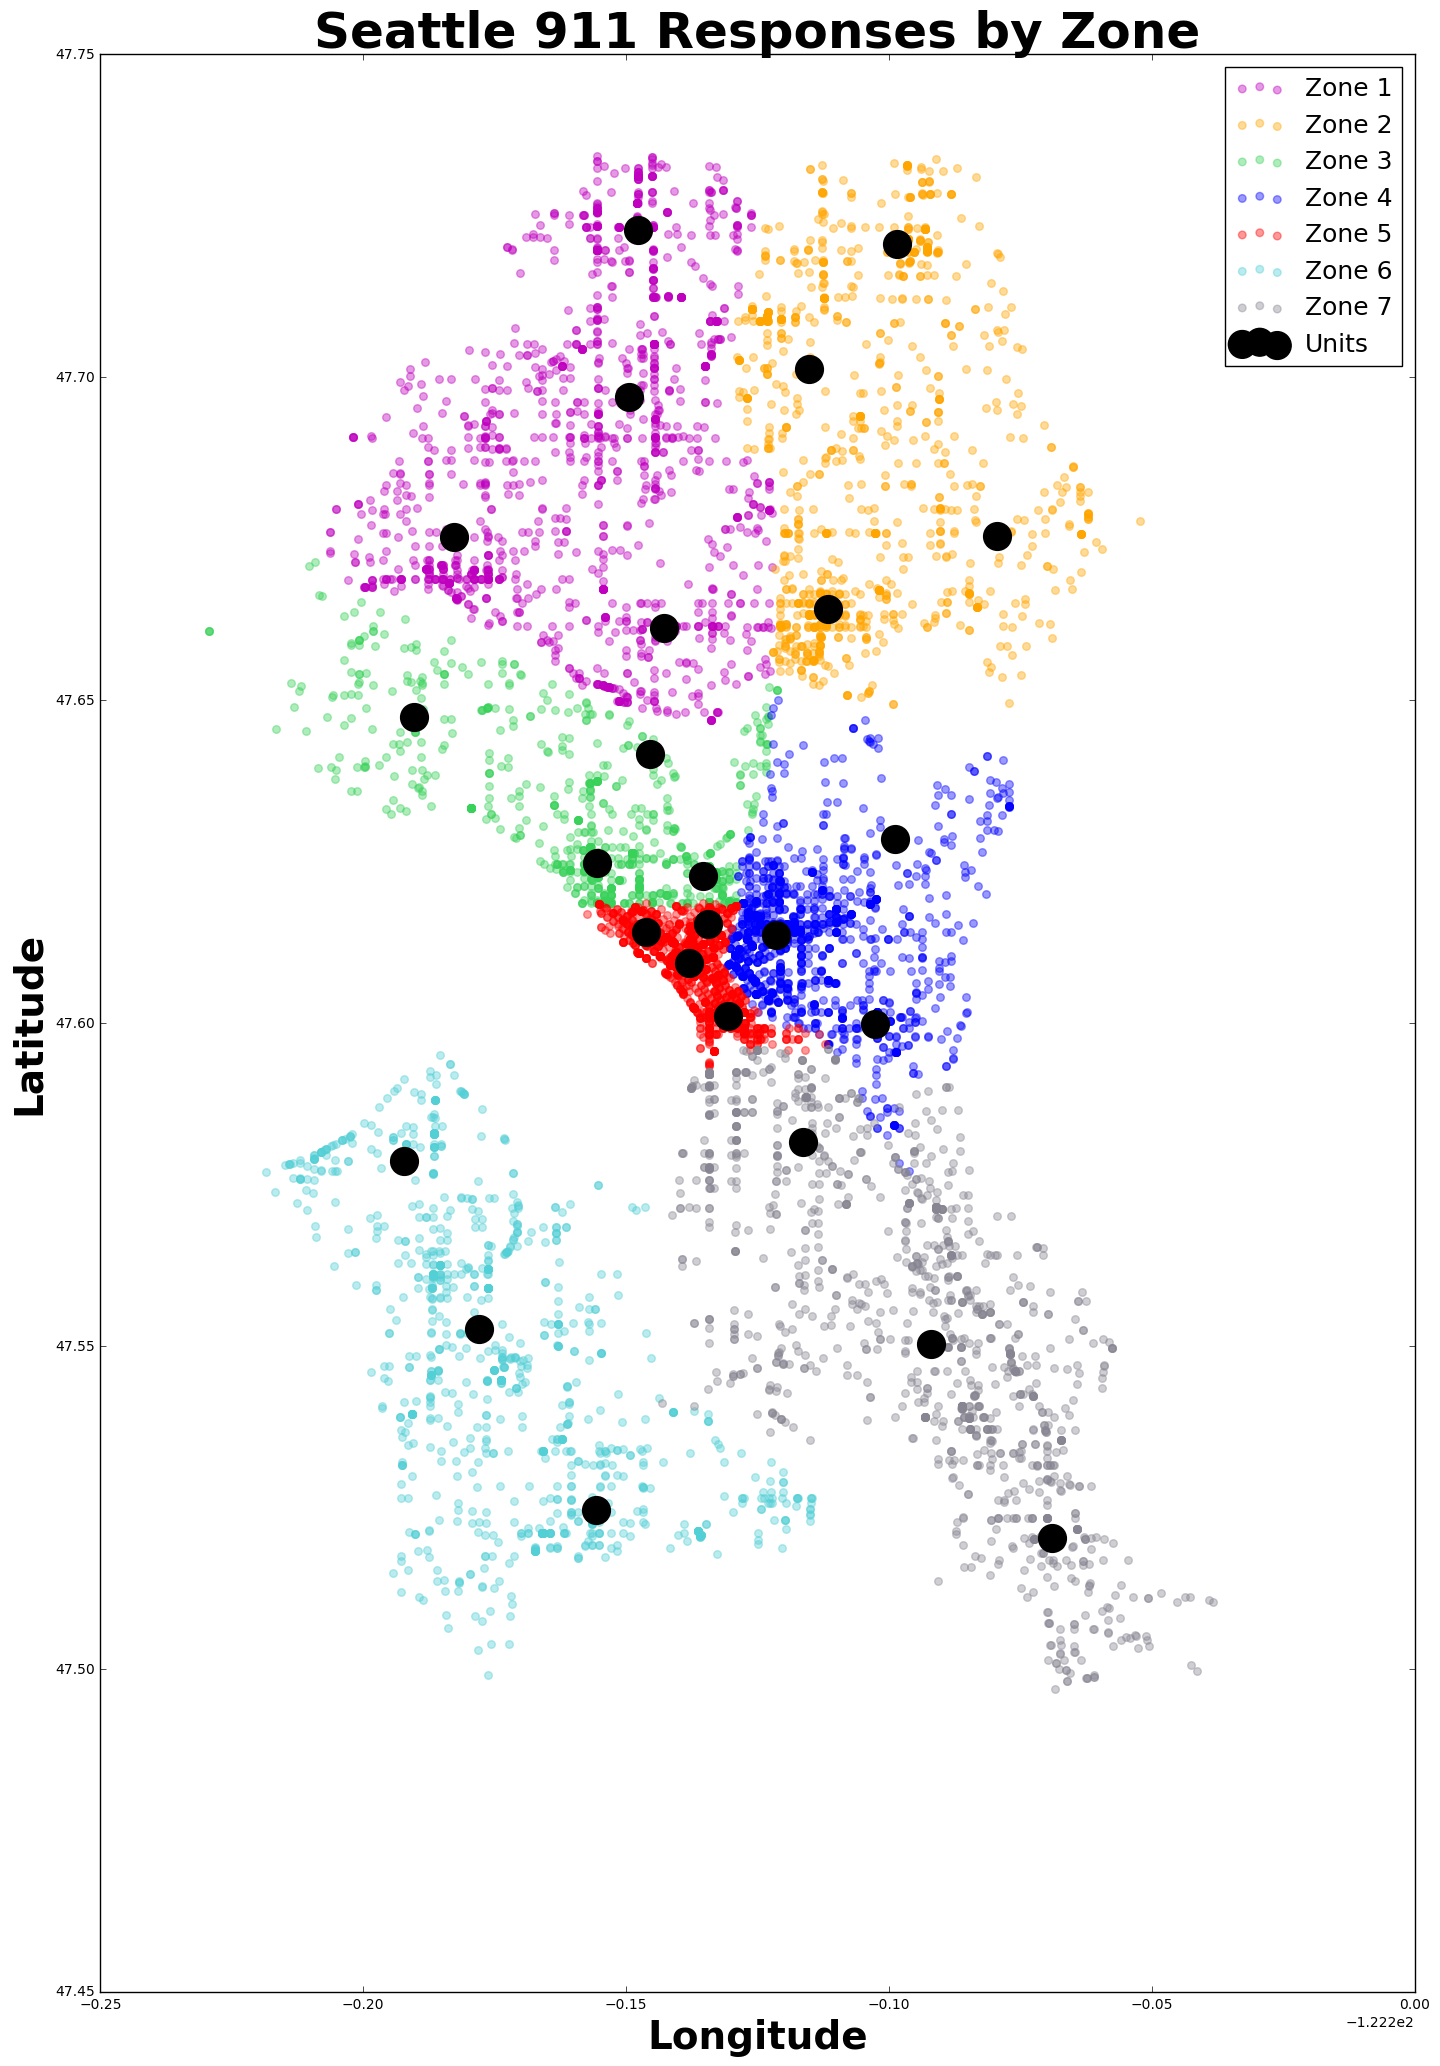

In [67]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=df5.Longitude, y=df5.Latitude, color='r', s=30, alpha=0.4)
plt.scatter(x=df6.Longitude, y=df6.Latitude, color='#53cfd6', s=30, alpha=0.4)
plt.scatter(x=df7.Longitude, y=df7.Latitude, color='#868591', s=30, alpha=0.4)
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Units'], fontsize=18)
plt.savefig('../app/static/seattle_911_pred_live.png')

In [43]:
centroid_df.index +=1
centroid_df

,Latitude,Longitude
1,47.689312,-122.356438
2,47.688540,-122.303929
3,47.631814,-122.356776
4,47.613020,-122.315275
5,47.608320,-122.336713
6,47.547523,-122.372586
7,47.554707,-122.295615


In [11]:
table = centroid_df.to_html()

In [12]:
table.replace("\n", "")

u'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Latitude</th>      <th>Longitude</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>47.671076</td>      <td>-122.362117</td>    </tr>    <tr>      <th>2</th>      <td>47.712627</td>      <td>-122.349176</td>    </tr>    <tr>      <th>3</th>      <td>47.681385</td>      <td>-122.289771</td>    </tr>    <tr>      <th>4</th>      <td>47.663089</td>      <td>-122.310895</td>    </tr>    <tr>      <th>5</th>      <td>47.714972</td>      <td>-122.306503</td>    </tr>    <tr>      <th>6</th>      <td>47.647360</td>      <td>-122.390289</td>    </tr>    <tr>      <th>7</th>      <td>47.624862</td>      <td>-122.355532</td>    </tr>    <tr>      <th>8</th>      <td>47.641747</td>      <td>-122.345265</td>    </tr>    <tr>      <th>9</th>      <td>47.622662</td>      <td>-122.335398</td>    </tr>    <tr>      <th>10</th>      <td>47.599795</td>      <td>-122.302692</td>    </

In [31]:
centroids

[(47.689311637274521, -122.356437645291),
 (47.688540474978005, -122.30392859525904),
 (47.631813665471874, -122.35677638590217),
 (47.613020433703497, -122.31527476551256),
 (47.608319813367579, -122.3367134997436),
 (47.547522572149376, -122.37258561150358),
 (47.554707234685679, -122.29561457597472)]

In [33]:
clusters1

defaultdict(list,
            {(47.689311637274521,
              -122.356437645291): [(47.701446000000004,
               -122.34988999999999), (47.665019000000001, -122.34741000000001), (47.699618999999998,
               -122.34463000000001), (47.690954999999995,
               -122.37546399999999), (47.723218000000003,
               -122.34819499999999), (47.680292999999999,
               -122.32582600000001), (47.72343,
               -122.34816499999999), (47.685006000000001, -122.38324799999999), (47.699608000000005,
               -122.34083000000001), (47.649822999999998,
               -122.351303), (47.720162000000002, -122.37267299999999), (47.725380000000001,
               -122.36364399999999), (47.670171000000003,
               -122.37653700000001), (47.674849999999999,
               -122.401082), (47.720162000000002, -122.37267299999999), (47.666666999999997,
               -122.383365), (47.668677000000002,
               -122.383498), (47.670538999999998, -122.322

In [73]:
query = str({'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'mariners', 'time_range': 0})
literal_eval(query)

{'date_input': '2016-11-20',
 'home_game': 'mariners',
 'num_units': 25,
 'time_range': 0}